Automatically created module for IPython interactive environment


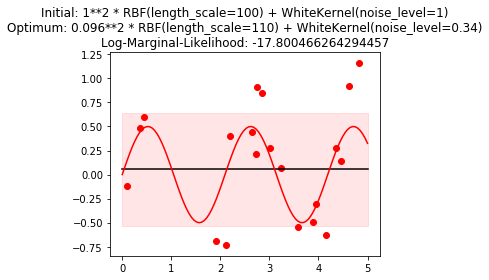

In [178]:
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.3, X.shape[0])

# First run
plt.figure(0)
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k')
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.1, color='r')
plt.plot(X_, 0.5*np.sin(3*X_), 'r')
plt.scatter(X[:, 0], y, c='r')
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

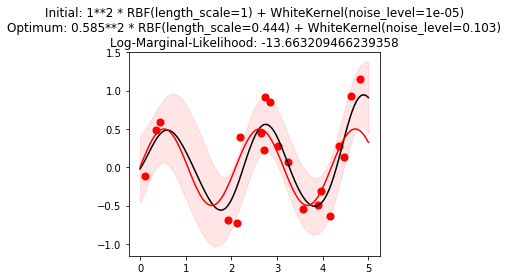

In [179]:
# Second run
plt.figure(1)
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k')
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.1, color='r')
plt.plot(X_, 0.5*np.sin(3*X_), 'r')
plt.scatter(X[:, 0], y, c='r', s=50)
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()

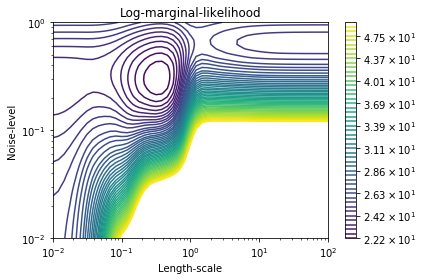

In [15]:
# Plot LML landscape
plt.figure(2)
theta0 = np.logspace(-2, 2, 49)
theta1 = np.logspace(-2, 0, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

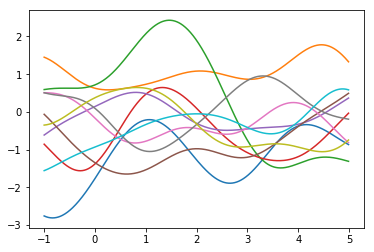

In [4]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import rc
# rc('text', usetex=True)

def rbf_kernel(x1, x2, variance = 1):
    return exp(-1 * ((x1-x2) ** 2) / (2*variance))

def gram_matrix(xs):
    return [[rbf_kernel(x1,x2) for x2 in xs] for x1 in xs]

rng = np.random.RandomState(0)

xs = np.arange(-1, 5, 0.01)
mean = [0 for x in xs]
gram = gram_matrix(xs)

plt_vals = []
for i in range(0, 10):
    ys = rng.multivariate_normal(mean, gram)
    plt_vals.extend([xs, ys])
plt.plot(*plt_vals)
plt.show()

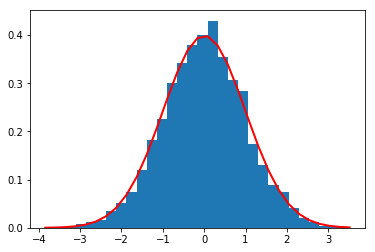

In [29]:
mu, sigma = 0, 1 # mean and std dev
s = np.random.normal(mu,sigma,5000)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

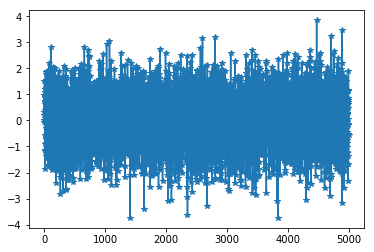

In [6]:
plt.plot(s,'-*')

In [67]:
# From this blogpost - https://blog.dominodatalab.com/fitting-gaussian-process-models-python/
import numpy as np
 
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

def conditional(x1, x2, y, params):
    S11 = exponential_cov(x1, x1, params)
    S12 = exponential_cov(x1, x2, params)
    S22 = exponential_cov(x2, x2, params)

    mu = S12.dot(np.linalg.inv(S22)).dot(x2)
    sigma = S11 - S12.dot(np.linalg.inv(S22).dot(S12.T))

    return(mu.squeeze(), sigma.squeeze())

<ErrorbarContainer object of 3 artists>

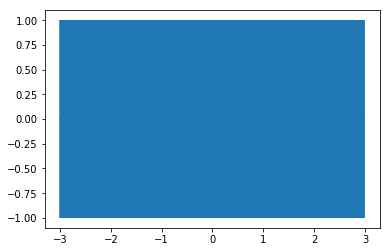

In [104]:
import matplotlib.pylab as plt
 
theta = [1, 10]
sig_0 = exponential_cov(0, 0, theta)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=sig_0, capsize=0)

In [105]:
x = [1.]
y = [np.random.normal(scale=sig_0)]
y

[-0.3949763329724458]

[1.0]

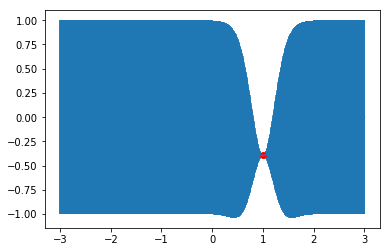

In [106]:
sig_1 = exponential_cov(x, x, theta)
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, theta, sig_1, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
x

In [78]:
m, s = conditional([-0.7], x, y, theta)
y2 = np.random.normal(m, s)
y2

-0.6940343244440642

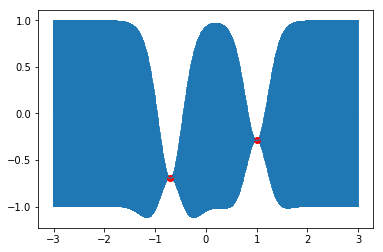

In [79]:
x.append(-0.7)
y.append(y2)
 
sig_2 = exponential_cov(x, x, theta)
predictions = [predict(i, x, exponential_cov, theta, sig_2, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

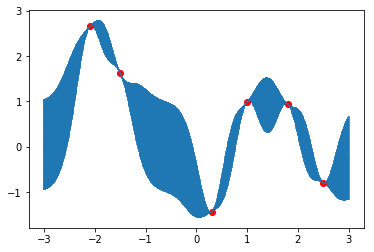

In [115]:
x = [1.]
y = [np.random.normal(scale=sig_0)]
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, theta)
y_more = np.random.multivariate_normal(mu, s)
x += x_more
y += y_more.tolist()
 
sig_new = exponential_cov(x, x, theta)
predictions = [predict(i, x, exponential_cov, theta, sig_new, y) for i in x_pred]
 
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")
